In [1]:
#libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [39]:
df_DS_US = df[(df['job_title'].str.contains('Data Scientist', case=False, na=False)) & (df['job_country']=='United States')]
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])
df_DS_US = df_DS_US.explode('job_skills')
df_DS_group = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
top_pay_skills = df_DS_group.sort_values(by='median', ascending=False).head(10)
df_DS_US_skills = df_DS_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


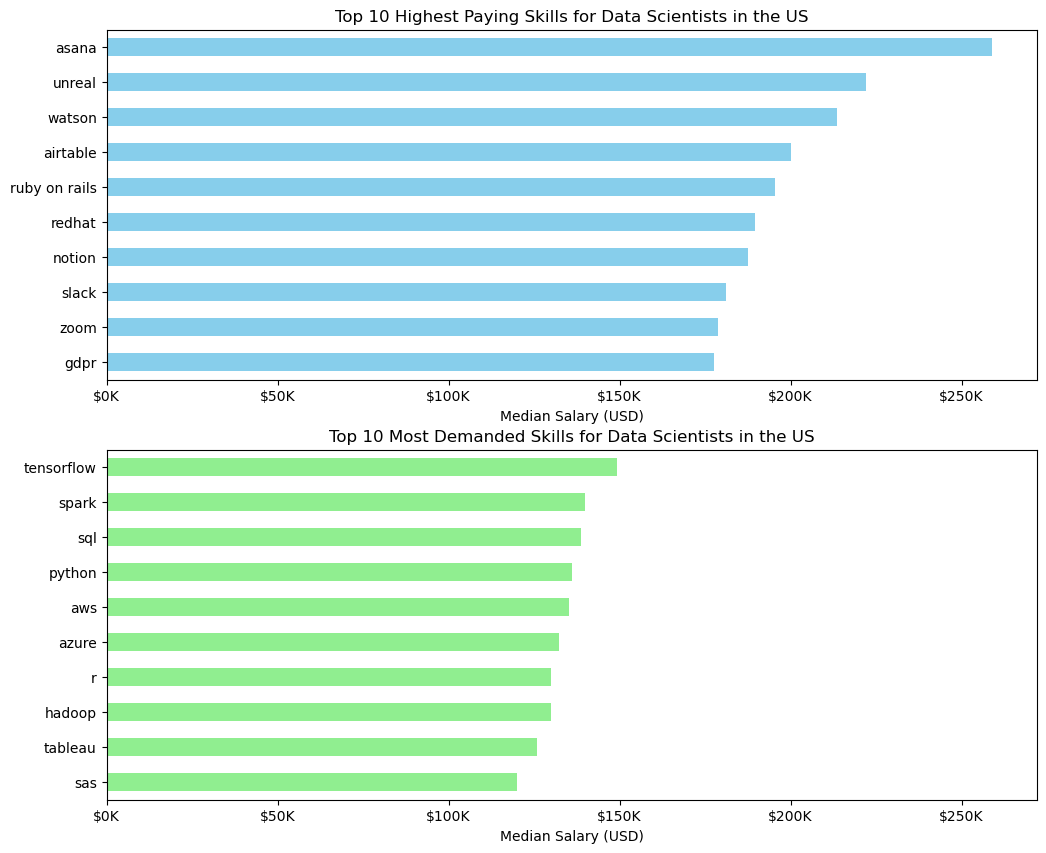

In [55]:
fig, ax = plt.subplots(2,1, figsize=(12,10))

top_pay_skills[::-1].plot(kind='barh', y='median', ax=ax[0], color='skyblue',legend=False)
# ax[0].invert_yaxis() [we could do this or even we could do that [::-1] to invert yaxis]
ax[0].set_title('Top 10 Highest Paying Skills for Data Scientists in the US')
ax[0].set_xlabel('Median Salary (USD)')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${int(x/1000)}K'))
df_DS_US_skills[::-1].plot(kind='barh', y='median', ax=ax[1], color='lightgreen', legend=False)
# ax[1].invert_yaxis() [we could do this or even we could do that [::-1] to invert yaxis]
ax[1].set_title('Top 10 Most Demanded Skills for Data Scientists in the US')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${int(x/1000)}K'))

ax[1].set_xlim(ax[0].get_xlim())


plt.show()